In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import gmaps
from config import gkey
import us
from pprint import pprint
import scipy.stats as st
import numpy as np
from scipy.stats import linregress



resource_path = "../../Resources"
all_by_state_path = f"{resource_path}/AllByState.csv"
all_by_state_daily_path = f"{resource_path}/AllByState-Daily.csv"

In [2]:
all_by_state_df = pd.read_csv(all_by_state_path)
all_by_state_df.head()

,Active,Confirmed,Date,Deaths,Fatality Rate,Recovered,State Name,State,Land Area (mi2),Population,Population Density,Per Capita Income,Median Household Income
0,12,12,2020-03-15,0,0.0000,0,Alabama,AL,49481.34,4846150.0,97.93894,26883.102656,41750.0
1,1033,1060,2020-04-01,27,0.0255,0,Alabama,AL,49481.34,4846150.0,97.93894,26883.102656,41750.0
2,3957,4075,2020-04-15,118,0.0290,0,Alabama,AL,49481.34,4846150.0,97.93894,26883.102656,41750.0
3,7005,7294,2020-05-01,289,0.0396,0,Alabama,AL,49481.34,4846150.0,97.93894,26883.102656,41750.0
4,10890,11373,2020-05-15,483,0.0425,0,Alabama,AL,49481.34,4846150.0,97.93894,26883.102656,41750.0


In [3]:
all_by_state_daily_df = pd.read_csv(all_by_state_daily_path)
all_by_state_daily_df.head()

,Active,Confirmed,Date,Deaths,Fatality Rate,Recovered,State Name,State,Active Diff,Confirmed Diff,Deaths Diff,Recovered Diff,Lat,Lon,Land Area (mi2),Population,Population Density,Per Capita Income,Median Household Income
0,0,0,2020-03-10,0,0.0,0,Alaska,AK,0,0,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
1,0,0,2020-03-11,0,0.0,0,Alaska,AK,0,0,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
2,0,0,2020-03-12,0,0.0,0,Alaska,AK,0,0,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
3,1,1,2020-03-13,0,0.0,0,Alaska,AK,1,1,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
4,1,1,2020-03-15,0,0.0,0,Alaska,AK,0,0,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0


In [4]:
max_date = all_by_state_daily_df["Date"].max()
max_date

'2020-07-23'

In [6]:
max_date_df = all_by_state_daily_df.sort_values("Date", ascending = False)
max_date_df.head()

,Active,Confirmed,Date,Deaths,Fatality Rate,Recovered,State Name,State,Active Diff,Confirmed Diff,Deaths Diff,Recovered Diff,Lat,Lon,Land Area (mi2),Population,Population Density,Per Capita Income,Median Household Income
3397,2866,2909,2020-07-23,43,0.0148,0,Montana,MT,96,97,1,0,46.9219,-110.4544,135639.85,1038180.0,7.653945,29784.234687,49833.0
3533,23502,23818,2020-07-23,316,0.0133,0,Nebraska,NE,327,332,5,0,41.1254,-98.2681,76243.49,1900182.0,24.922547,31121.371768,55236.0
3125,46617,48053,2020-07-23,1436,0.0299,0,Mississippi,MS,969,982,13,0,32.7416,-89.6787,45729.42,2962109.0,64.774690,23556.907406,38418.0
2989,47120,48721,2020-07-23,1601,0.0329,0,Minnesota,MN,751,760,9,0,45.6945,-93.9002,77477.43,5523621.0,71.293291,36262.683567,60000.0
2853,78036,84431,2020-07-23,6395,0.0757,0,Michigan,MI,694,701,7,0,43.3266,-84.5361,55526.86,9935027.0,178.922903,30369.333747,52203.0


In [14]:
grouped_state_name = max_date_df.groupby(["State Name"])
grouped_state_name.first()

# confirmed = grouped_state_name["Confirmed"].max()
# confirmed

population_density = grouped_state_name["Population Density"].sum()
population_density

deaths = grouped_state_name["Deaths"].sum()
deaths

# pop = grouped_state_name["Population"].mean()
# pop

# pop_df = pd.DataFrame({"Population": pop})
# pop_max = pop_df.sort_values("Population", ascending = False)
# pop_max.head()

State Name
Alabama             68593
Alaska               1287
Arizona            114740
Arkansas            17533
California         447574
Colorado           135145
Connecticut        356838
Delaware            35223
Florida            269217
Georgia            212299
Hawaii               1792
Idaho                8404
Illinois           515372
Indiana            203349
Iowa                49003
Kansas              22367
Kentucky            44078
Louisiana          279122
Maine                8625
Maryland           236572
Massachusetts      633470
Michigan           532839
Minnesota          100693
Mississippi         75789
Missouri            75300
Montana              2079
Nebraska            17908
Nevada              42349
New Hampshire       24556
New Jersey        1159034
New Mexico          34849
New York          2932114
North Carolina      96259
North Dakota         5823
Ohio               209735
Oklahoma            33325
Oregon              16955
Pennsylvania       508743
R

In [16]:
pop_density_df = pd.DataFrame({"Population Density": population_density,
                                "Deaths": deaths})
pop_density_vs_deaths = pop_density_df.sort_values("Population Density", ascending = False).head()
pop_density_vs_deaths

,Population Density,Deaths
State Name,,
New Jersey,171278.002245,1159034
Rhode Island,139793.802278,66890
Massachusetts,119700.720978,633470
Connecticut,100516.552819,356838
Maryland,85316.561086,236572


In [17]:
pop_density_vs_deaths_df = pop_density_df.sort_values("Population Density", ascending = False)
pop_density_vs_deaths_df

,Population Density,Deaths
State Name,,
New Jersey,171278.002245,1159034
Rhode Island,139793.802278,66890
Massachusetts,119700.720978,633470
Connecticut,100516.552819,356838
Maryland,85316.561086,236572
Delaware,65966.959499,35223
Florida,63874.699605,269217
New York,57684.645709,2932114
California,54831.991188,447574


In [18]:
deaths_by_pop_density = pop_density_df.sort_values("Deaths", ascending = False).head()
deaths_by_pop_density

,Population Density,Deaths
State Name,,
New York,57684.645709,2932114
New Jersey,171278.002245,1159034
Massachusetts,119700.720978,633470
Michigan,24333.514843,532839
Illinois,31748.728552,515372


In [10]:
deaths_by_pop_density_df = pop_density_df.sort_values("Deaths", ascending = False)
deaths_by_pop_density_df

,Population Density,Deaths
State Name,,
New York,424.151807,32594
New Jersey,1259.397075,15737
Massachusetts,880.152360,8484
California,403.176406,8201
Illinois,233.446533,7560
Pennsylvania,285.775169,7093
Michigan,178.922903,6395
Florida,469.666909,5518
Texas,124.836045,4622


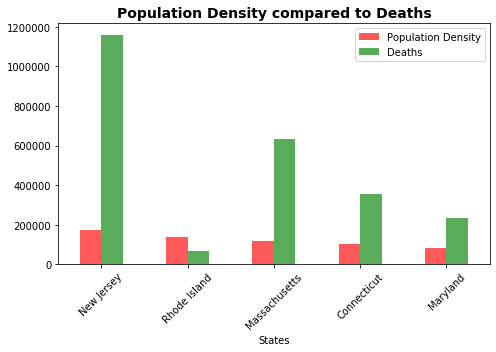

In [19]:
pop_density_vs_deaths.plot(kind = "bar", alpha = 0.65, color = ("r", "g"), align = "center", figsize = (7, 5), legend = True)
plt.title("Population Density compared to Deaths", fontsize= 14, fontweight = "bold")
plt.xlabel("States")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("Population Density compared to Deaths.png")
plt.show()

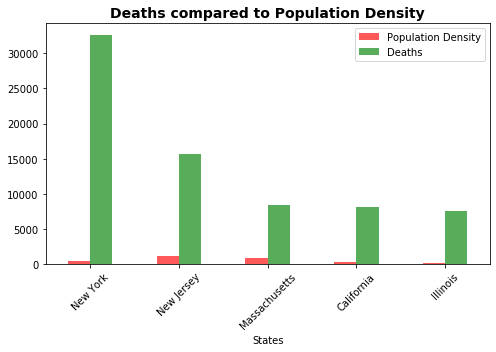

In [12]:
deaths_by_pop_density.plot(kind = "bar", alpha = 0.65, color = ("r", "g"), align = "center", figsize = (7, 5), legend = True)
plt.title("Deaths compared to Population Density", fontsize= 14, fontweight = "bold")
plt.xlabel("States")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("Deaths compared to Population Density.png")
plt.show()

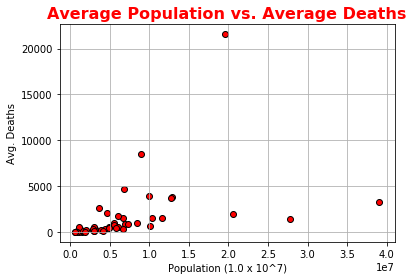

In [13]:
max_date_df

avg_pop = max_date_df.groupby(["State Name"])["Population"].mean()
avg_death = max_date_df.groupby(["State Name"])["Deaths"].mean()

plt.scatter(avg_pop, avg_death, marker = "o", facecolors = "red", edgecolors = "black")
plt.title("Average Population vs. Average Deaths", fontsize = 16, fontweight = "bold", color = "r")
plt.xlabel("Population (1.0 x 10^7)")
plt.ylabel("Avg. Deaths")
plt.grid()
plt.show()


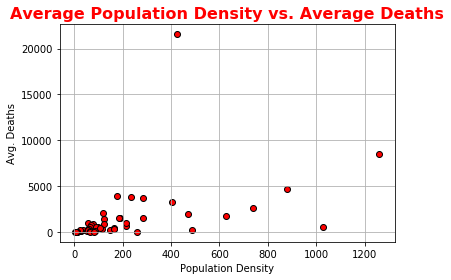

In [14]:
avg_pop_den= max_date_df.groupby(["State Name"])["Population Density"].mean()
avg_death = max_date_df.groupby(["State Name"])["Deaths"].mean()

plt.scatter(avg_pop_den, avg_death, marker = "o", facecolors = "red", edgecolors = "black")
plt.title("Average Population Density vs. Average Deaths", fontsize = 16, fontweight = "bold", color = "r")
plt.xlabel("Population Density")
plt.ylabel("Avg. Deaths")
plt.grid()
plt.show()

In [15]:
correlation = st.pearsonr(avg_pop_den, avg_death)
print(correlation)
corr = (f"The correlation between both is {round(correlation[0], 2)}")

(0.4355213485119, 0.0015715222136753117)


The r-squared value is: 0.1896788450096239


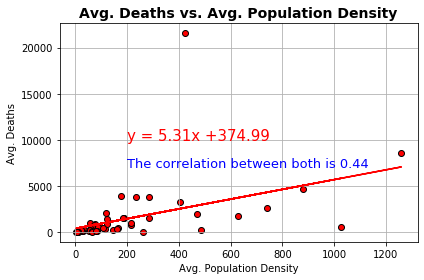

In [16]:
x_values = avg_pop_den
y_values = avg_death
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", facecolors = "red", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (200, 10000), fontsize = 15, color = "red")
plt.annotate(corr, (200, 7000), fontsize = 13, color = "blue")
plt.grid()
plt.title("Avg. Deaths vs. Avg. Population Density", fontsize = 14, fontweight = "bold")
plt.xlabel("Avg. Population Density")
plt.ylabel("Avg. Deaths")
print(f"The r-squared value is: {rvalue**2}")
plt.tight_layout()
plt.savefig("Avg. Population Density vs. Avg. Deaths per State.png")
plt.show()

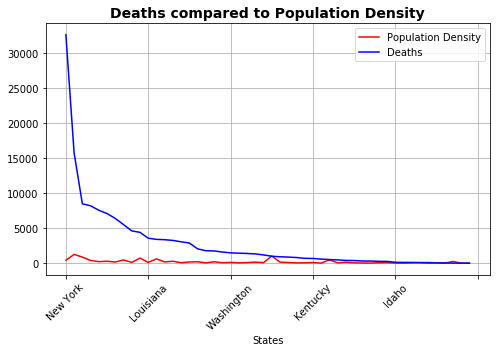

In [17]:
deaths_by_pop_density_df.plot(kind = "line", alpha = 1.0, color = ("r", "b"), figsize = (7, 5), legend = True)
plt.title("Deaths compared to Population Density", fontsize= 14, fontweight = "bold")
plt.xlabel("States")
plt.xticks(rotation = 45)
plt.grid()
plt.tight_layout()
plt.savefig("LG - Deaths compared to Population Density.png")
plt.show()

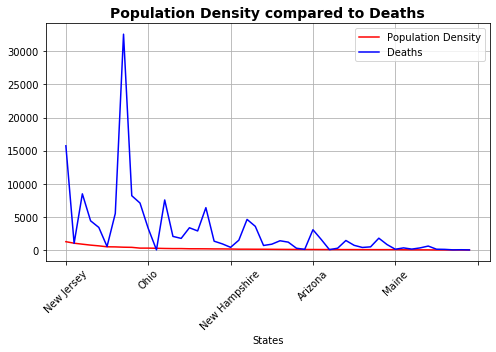

In [18]:
pop_density_vs_deaths_df.plot(kind = "line", alpha = 1.0, color = ("r", "b"), figsize = (7, 5), legend = True)
plt.title("Population Density compared to Deaths", fontsize= 14, fontweight = "bold")
plt.xlabel("States")
plt.xticks(rotation = 45)
plt.grid()
plt.tight_layout()
plt.savefig("LG - Population Density compared to Deaths.png")
plt.show()